# PHYS 481 Assignment 4

### Authors: Hayden Church, Aki Takimoto, Christian Salinas, Yuwan Nakamura


## Introduction
In this assignment, we analyze techinques of shuffling (riffle and overhand shuffling) and pseudorandom numbers applying it to programming. In addition, shuffling can be applied into image arrays with transformation. Finally, statistical tests (like Pearson's Chi-square) tests the hypothesis who a deck's sequence is drawn from a uniform random distribution.   


In [11]:
# Load standard libraries for numerical methods and plotting.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1A

In [24]:
#Q1A
deck_initial = np.zeros(52)
for i in range(len(deck_initial)):
    deck_initial[i] = i
    
def faro(deck, type):
    '''
    Takes in a original deck and the type of riffle shuffle (in or out) as arguments. Outputs a shuffled deck of cards.
    '''
    top = deck[0:26]                 #separate the input deck into top and bottom halves
    bottom = deck[26:52]
    shuffled = np.zeros(52)           #generates a blank deck of cards to copy the cards from the original deck into
    for j in range(len(top)):
        if type == 'out':              #if out shuffle, the top card stays the same
            shuffled[2*j] = top[j]
            shuffled[1 + 2*j] = bottom[j]
        if type == 'in':                  #if in shuffle, the top card is not the same
            shuffled[2*j] = bottom[j]
            shuffled[1 + 2*j] = top[j]
        
    return shuffled                          # returns the shuffled card


shuffles = 7                      #initialize number of shuffles executed in a row             
decks = [deck_initial]    #list of decks, in which the shuffled version of the previous deck in the list will be appended to
for i in range(shuffles):     
    decks.append(faro(decks[i], 'out'))     #apply faro shuffle to the last deck in the list of decks
print(decks[-1])                          #shows the deck after shuffles=7 shuffle.

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.  1.  3.  5.  7.  9. 11. 13. 15. 17. 19.
 21. 23. 25. 27. 29. 31. 33. 35. 37. 39. 41. 43. 45. 47. 49. 51.]


Indeed 7 shuffles, the deck is not randomized because there is an obeservable pattern of +2 for each card in the first half of the deck, and the same pattern again in the other half.

## Q1B

In [20]:
#Q1B
decks = [deck_initial, faro(deck_initial, 'in')]       #list of decks
counter = 1                                            #number of shuffles done

while np.allclose(decks[counter], deck_initial) is False:   #while loop that checks if deck has returned to original state
    decks.append(faro(decks[counter], 'in'))        #append shuffled version of the most recent deck in the list to the list
    counter = counter + 1                           #iterate counter
    
print(decks[-1])                          #show what the deck looks like after counter iterations.(should be original deck)
print('It takes', counter, 'shuffles for an in-shuffle to get back to the original deck.')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]
It takes 52 shuffles for an in-shuffle to get back to the original deck.


## Q1C

In [21]:
#Q1C
def overhand(deck_initial, N):
    '''
    Takes the unshuffled deck and the number of cards taken from the top of the deck as arguments. 
    Performs overhand shuffle
    '''
    deck_new = np.zeros(52)              #creates blank deck to copy the cards into. this will be the shuffled deck
    for i in range(52//N):               #for loop that performs the shuffle for how many times N fits into 52
        deck_new[52 - (i+1)*N : 52 - i*N] = deck_initial[i*N : (i+1)*N]
    if 52//N != 0:                       #if 52 divided by N has a remainder, copies the remainder from original deck to copy
        deck_new[52 - ((52//N)+1)*N + np.abs((52 - ((52//N)+1)*N)) : 52 - (52//N)*N] = deck_initial[(52//N)*N : ((52//N)+1)*N - np.abs((52 - ((52//N)+1)*N))]
    return deck_new                      # returns shuffled deck

In [22]:
N = 8                                                  #initialize how many cards are taken from top of deck
decks = [deck_initial, overhand(deck_initial, N)]      #list of decks that will contain decks from zero iteration(original) to N interations
counter = 1                                            

while np.allclose(decks[counter], deck_initial) is False:  #while loop that stops when the deck has returned to original state
    decks.append(overhand(decks[counter], N))              #append shuffled version of the most previous deck in the list to the list
    counter = counter + 1                                  #iterate counter(represents number of iterations done)

print(decks[-1])                                           #shows that the deck has returned to original state
print('It takes', counter, 'shuffles for an overhand shuffle to get back to the original deck when N =', N, '.')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]
It takes 13 shuffles for an overhand shuffle to get back to the original deck when N = 8 .


## Q1D

From a real card shuffle, there would be more iterations until the cards have returned to their original order. Humans can mess up their shuffle if they don't count the number of cards they have taken to shuffle. Like the overhand shuffle, they can accidentally grab more or less amount of block size N when shuffling. There can be miscounts or misplacements while they shuffle causing inconsistencies. But for in-shuffle, the number of times to shuffle back to the original order could be 7 times instead of the 52 times calculated here. Indeed, the mathematical models rely on systematic patterns, which removes randomness that can be seen in a real card shuffle such as human error; a person might not be able to perfectly execute a faro shuffle each time.

## Q2A

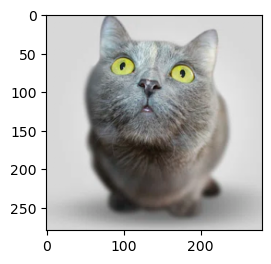

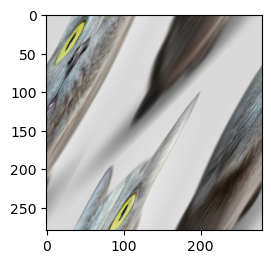

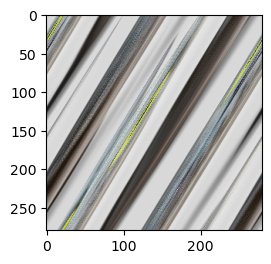

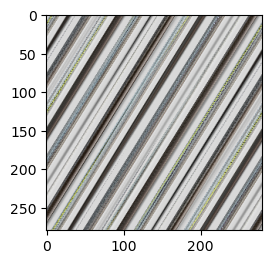

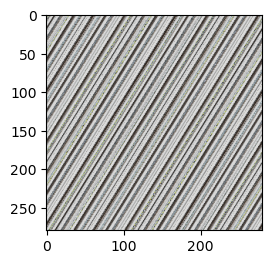

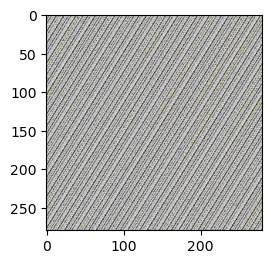

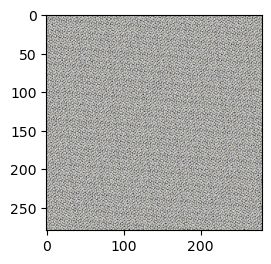

In [28]:
#Q2A
import matplotlib

def catmap(square):
    """
    Apply Arnold's cat map to a square NxN numpy array
    using array indexing.
    """
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    x, y = np.arange(nx), np.arange(ny)
    x1, y1 = np.meshgrid(x, y, sparse=False, indexing='ij')
    xx = x1 + y1
    yy = x1 + 2*y1
    return square[xx % nx, yy % ny]


def display_img(img1):
    """
    Display 1 RGBA images in matplotlib format inline in Jupyter.
    Disable any resizing of the images; show them at the exact resolution of the image without rescaling the pixel size.
    """
    dpi = matplotlib.rcParams['figure.dpi']  # dots per inch of the device
    height = img1.shape[0]
    width = img1.shape[1]
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize)
    plt.imshow(img1)


# read in image and create copy
img = plt.imread('cat.png')
cat = img.copy()

# display the original unaltered image
display_img(img)
cat_iter = 0

# alter and display first 6 iterations
for i in range(6):
    img = catmap(img)
    display_img(img)
    cat_iter += 1

## Q2B

ITERATIONS UNTIL ORIGINAL STATE: 120


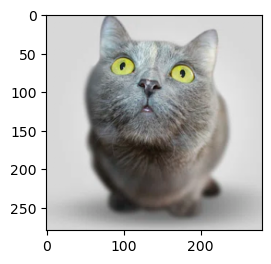

In [20]:
#Q2B

# iterate until altered image == original image
while 1:
    img = catmap(img)
    cat_iter += 1

    if ((img[i] == cat[i]).all()):
        break

print("ITERATIONS UNTIL ORIGINAL STATE:", cat_iter)
display_img(img)

## Q2C
It is hard for computers to generate randomness because they are binary machines that are deterministic. There is no point in computation to introduce randomness because all calculations come from a series of 1s and 0s. The CPU takes inputs and is designed to give a specific output based on the input. Computers are completely deterministic, and algorithmically based from things as simple as truth tables and boolean logic that have been extended into logic gates. All of the math involved in building a computer is based off yes or no, true false, 1 or 0. 

## Q3A

Chisq value = 61.528000000000006
p-value = 0.14841190615841676


<BarContainer object of 52 artists>

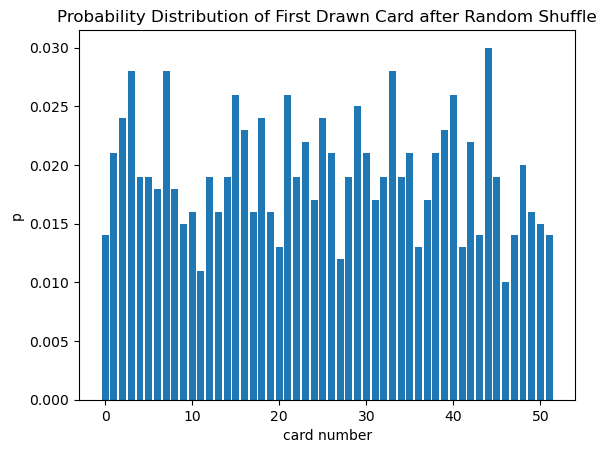

In [36]:
#Q3A
from scipy.stats import chisquare

# setting for random shuffling 
deck = list(range(0,52))
num_shuffle = 1000
all_sequences = len(deck)
drawn_box = []

def probability(deck, num_shuffle):
    # Create a random number generator instance
    random = np.random.default_rng()
    
    # loop, shuffle deck, and append the first drawn card
    for i in range(num_shuffle):
        random.shuffle(deck)
        drawn_box.append(deck[0])  # draw first card
    
    # obtain histogram, sequence, chisquare stats, p values and probability 
    hist, sequence = np.histogram(drawn_box, bins=52, range=(0,52))
    chisq, p_value = chisquare(hist)  
    sequence = sequence[:-1]  # need to get rid of the last edge that is empty
    prob = hist/np.sum(hist)  # normalization

    # return necessary values
    return chisq, p_value, sequence, prob


# obtain X^2, p, sequence, and probability 
chi, p, sequence, prob = probability(deck, num_shuffle)

# print and plot results
print("Chisq value =", chi)
print("p-value =", p)
plt.figure()
plt.xlabel("card number")
plt.ylabel("p")
plt.title("Probability Distribution of First Drawn Card after Random Shuffle")
plt.bar(sequence, prob)

Throughout all the numbers, none show any deviation from large or small values of p. Only a couple of numbers did show small values of p, but not too concerning. Thus, this implys that the code results are consistent with the hypothesis that the seqences are drawn from a uniform random distribution. 

## Q3B

Chisq value = 0.48
p-value = 1.0


<BarContainer object of 52 artists>

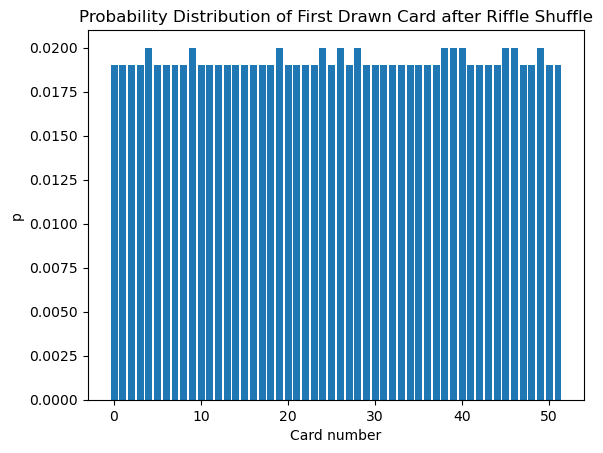

In [35]:
#Q3B, use riffle function from Q1

# setting for random shuffling 
deck = list(range(0,52))
num_shuffle = 1000
drawn_box = []

def probability_riffle(deck, num_shuffle):
    # loop, shuffle deck, and append the first drawn card
    for i in range(num_shuffle):
        deck = faro(deck, "in")  # Perform an in shuffle
        drawn_box.append(deck[0])  # draw first card
    
    # obtain histogram, sequence, chisquare stats, p values and probability 
    hist, sequence = np.histogram(drawn_box, bins=52, range=(0,52))
    chisq, p_value = chisquare(hist)  
    sequence = sequence[:-1]  # need to get rid of the last edge that is empty
    prob = hist/np.sum(hist)  # normalization

    # return necessary values
    return chisq, p_value, sequence, prob

# obtain X^2, p, sequence, and probability 
chi, p, sequence, prob = probability_riffle(deck, num_shuffle)

# print and plot results
print("Chisq value =", chi)
print("p-value =", p)
plt.figure()
plt.xlabel("Card number")
plt.ylabel("p")
plt.title("Probability Distribution of First Drawn Card after Riffle Shuffle")
plt.bar(sequence, prob)

With the addition of riffle shuffle, the distribution is more consistent with one another with the limit of P values not going under 0.0175. Yet, They do not result below 0.05 or above 0.95, so the deck is consistent with the hypothesis that the sequences are drawn from a uniform random distribution. 

## Q3C

Chisq value = 43.105999999999995
p-value = 0.7760957084823462


<BarContainer object of 52 artists>

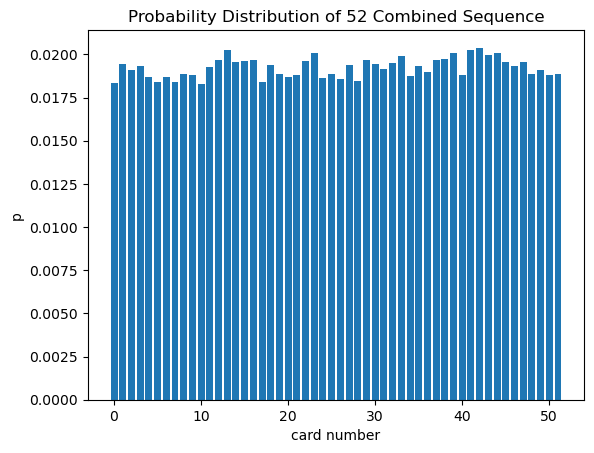

In [38]:
#Q3C
deck = list(range(0,52))
num_shuffle = 1000
drawn_box = []

def probability_52000(deck, num_shuffle):
    # Create a random number generator instance
    random = np.random.default_rng()
    
    # loop, shuffle deck, and append the first drawn card
    for j in range(52):
        for i in range(num_shuffle):
            random.shuffle(deck)
            drawn_box.append(deck[j])  # draw first card

    # obtain histogram, sequence, chisquare stats, p values and probability 
    hist, sequence = np.histogram(drawn_box, bins=52, range=(0,52))
    chisq, p_value = chisquare(hist)  
    sequence = sequence[:-1]  # need to get rid of the last edge that is empty
    prob = hist/np.sum(hist)  # normalization

    # return necessary values
    return chisq, p_value, sequence, prob


# obtain X^2, p, sequence, and probability 
chi, p, sequence, prob = probability_52000(deck, num_shuffle)

# print and plot results
print("Chisq value =", chi)
print("p-value =", p)
plt.figure()
plt.xlabel("card number")
plt.ylabel("p")
plt.title("Probability Distribution of 52 Combined Sequence")
plt.bar(sequence, prob)

## Q3D

The plot above yields to be the expected result if we combine all 52 sequences. The plot differs around the range of 0.0175 to 0.0200 which is consistent through each card number. Again, the results with the hypothesis of uniform random distribution are consistent and holds when combining all 52 seqeunces. 

## Conclusion

In conclusion, we have studied and analyzed different types of shuffling and pseudorandom numbers. In question 1, we studied how many shuffles it takes for a deck of cards to be reshuffled back into its original order. From in-shuffle riffle (8 shuffles), out-shuffle riffle (52 shuffles), and overhand(13 shuffles). In the case of out-shuffle, this is due to the deck not being real and simply numbers. A real deck would have human error causing the shuffle to return to its original order by 8 shuffles or more. In question 2, similar shuffling is applied to a cat image by rearranging the pixels. As well transformations were applied. As well we found out it takes 120 iterations for the image to return to its original state. In question 3, we used Pearson's Chi-square test to analyze the probability that a card is drawn. Results proved that the probability of each card number remains consistent that the sequences are drawn from a uniform random distribution. 